<a href="https://colab.research.google.com/github/jinxiqinghuan/learn_pytorch/blob/main/%E9%BE%99%E6%9B%B2%E8%89%AF%E8%80%81%E5%B8%88%E8%AF%BE%E7%A8%8B%E7%AC%94%E8%AE%B0/06_%E9%9A%8F%E6%9C%BA%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. 随机梯度下降

In [2]:
import torch
from torch.nn import functional as F
from matplotlib import pyplot as plt
import numpy as np

## 激活函数与loss的梯度

### 激活函数
* sigmoid
* tanh
* relu

In [ ]:
a = torch.linspace(-5, 5, 100)

In [ ]:
torch.sigmoid(a)

tensor([0.0067, 0.0074, 0.0082, 0.0090, 0.0100, 0.0110, 0.0122, 0.0135, 0.0149,
        0.0164, 0.0182, 0.0201, 0.0221, 0.0244, 0.0270, 0.0297, 0.0328, 0.0362,
        0.0399, 0.0439, 0.0483, 0.0532, 0.0585, 0.0644, 0.0707, 0.0776, 0.0852,
        0.0934, 0.1023, 0.1120, 0.1224, 0.1337, 0.1458, 0.1589, 0.1728, 0.1878,
        0.2036, 0.2205, 0.2384, 0.2572, 0.2770, 0.2976, 0.3192, 0.3415, 0.3646,
        0.3883, 0.4125, 0.4372, 0.4622, 0.4874, 0.5126, 0.5378, 0.5628, 0.5875,
        0.6117, 0.6354, 0.6585, 0.6808, 0.7024, 0.7230, 0.7428, 0.7616, 0.7795,
        0.7964, 0.8122, 0.8272, 0.8411, 0.8542, 0.8663, 0.8776, 0.8880, 0.8977,
        0.9066, 0.9148, 0.9224, 0.9293, 0.9356, 0.9415, 0.9468, 0.9517, 0.9561,
        0.9601, 0.9638, 0.9672, 0.9703, 0.9730, 0.9756, 0.9779, 0.9799, 0.9818,
        0.9836, 0.9851, 0.9865, 0.9878, 0.9890, 0.9900, 0.9910, 0.9918, 0.9926,
        0.9933])

<function matplotlib.pyplot.show>

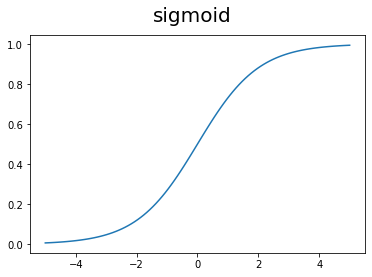

In [ ]:
plt.figure('sigmlid')
plt.plot(a, torch.sigmoid(a))
plt.suptitle('sigmoid', fontsize=20)
plt.show

Text(0.5, 0.98, 'tanh')

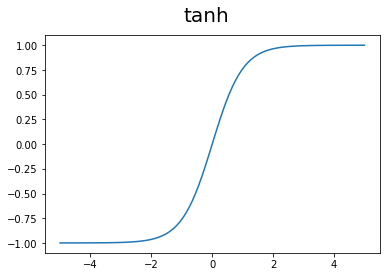

In [ ]:
a = torch.linspace(-5, 5, 100)
torch.tanh(a)
plt.plot(a, torch.tanh(a))
plt.suptitle('tanh', fontsize=20)


Text(0.5, 0.98, 'relu')

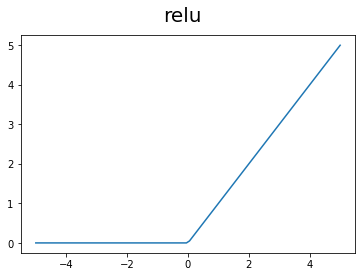

In [ ]:
F.relu(a)
plt.plot(a, torch.relu(a))
plt.suptitle('relu', fontsize=20)

### 损失函数
* Mean Squared Error(MSE)
* Cross Entropy Loss
  * binary
  * multi-class
  * +softmax
  * Leave it to Logistic Regression Part

### Gradient API
* torch.autograd.grad(loss, [w1, w2, ...])
* loss.backward()

In [ ]:
x = torch.ones(1).float()
x

tensor([1.])

In [ ]:
w = torch.full([1], 2).float()
w

tensor([2.])

In [ ]:
mse = F.mse_loss(torch.ones(1), x*w)
mse

tensor(1.)

In [ ]:
# torch.autograd.grad(mse, [w])
# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
w.requires_grad_() # 更新信息，w需要梯度信息

tensor([2.], requires_grad=True)

In [ ]:
# torch.autograd.grad(mse, [w])
# 前边图已经建好了，需要重建

In [ ]:
mse = F.mse_loss(torch.ones(1), x*w)

In [ ]:
torch.autograd.grad(mse, [w])

(tensor([2.]),)

loss.backward()

In [ ]:
mse = F.mse_loss(torch.ones(1), x*w)
mse.backward()

In [ ]:
w.grad

tensor([2.])

### 激活函数Softmax

In [ ]:
a = torch.rand(3)
a

tensor([0.9276, 0.4183, 0.9416])

In [ ]:
a.requires_grad_()

tensor([0.9276, 0.4183, 0.9416], requires_grad=True)

In [ ]:
p = F.softmax(a, dim=0)
p

tensor([0.3824, 0.2298, 0.3878], grad_fn=<SoftmaxBackward>)

In [ ]:
# p.backward() 

In [ ]:
p = F.softmax(a, dim=0)
p

tensor([0.3824, 0.2298, 0.3878], grad_fn=<SoftmaxBackward>)

In [ ]:
torch.autograd.grad(p[1], [a], retain_graph=True)

(tensor([-0.0879,  0.1770, -0.0891]),)

In [ ]:
torch.autograd.grad(p[2], [a])

(tensor([-0.1483, -0.0891,  0.2374]),)

## 感知机的梯度推导

### 单层感知机

In [ ]:
x = torch.randn(1, 10)
x

tensor([[-0.1465, -1.8298, -0.5152, -0.1576, -0.3295, -0.9647,  0.1012,  0.2668,
         -0.9337,  1.3363]])

In [ ]:
w = torch.randn(1, 10, requires_grad=True)
w

tensor([[ 1.3760,  1.2454, -1.0105, -0.1059, -2.0536,  0.4346, -0.3652, -0.8429,
         -2.0686, -1.2068]], requires_grad=True)

In [ ]:
o = torch.sigmoid(x@w.t()) # o = x@wt   [1, 10][10, 1] -> [1, 1]
o, o.shape

(tensor([[0.1640]], grad_fn=<SigmoidBackward>), torch.Size([1, 1]))

In [ ]:
loss = F.mse_loss(torch.ones(1, 1), o)

In [ ]:
loss

tensor(0.6989, grad_fn=<MseLossBackward>)

In [ ]:
loss.shape

torch.Size([])

In [ ]:
loss.backward() # 

In [ ]:
w.grad

tensor([[ 0.0336,  0.4195,  0.1181,  0.0361,  0.0755,  0.2211, -0.0232, -0.0612,
          0.2140, -0.3063]])

In [ ]:
#  w = w - lr*w.grad

tensor([[ 1.3760,  1.2454, -1.0105, -0.1059, -2.0536,  0.4346, -0.3652, -0.8429,
         -2.0686, -1.2068]], requires_grad=True)

### 多层感知机

In [ ]:
x = torch.randn(1, 10)
x

tensor([[ 0.2475,  0.8349,  1.6537,  0.0686,  0.4028, -0.9601,  0.2788, -0.8227,
         -1.7567, -1.2749]])

In [ ]:
w = torch.randn(2, 10, requires_grad=True)
w

tensor([[-0.4075,  1.0559, -0.1422,  2.8708, -1.3839, -2.1603, -0.3048,  0.0615,
         -0.1561, -0.2613],
        [ 0.1265, -0.5917, -0.7767, -0.3994,  0.6835,  0.5673,  0.6521,  0.4654,
         -0.9249, -0.2015]], requires_grad=True)

In [ ]:
o = torch.sigmoid(x@w.t())
o.shape

torch.Size([1, 2])

In [ ]:
loss = F.mse_loss(torch.ones(1, 2), o)
loss

tensor(0.1758, grad_fn=<MseLossBackward>)

In [ ]:
loss.backward()

In [ ]:
w.grad

tensor([[-8.6937e-04, -2.9333e-03, -5.8097e-03, -2.4114e-04, -1.4153e-03,
          3.3730e-03, -9.7933e-04,  2.8902e-03,  6.1717e-03,  4.4790e-03],
        [-3.5312e-02, -1.1914e-01, -2.3598e-01, -9.7948e-03, -5.7485e-02,
          1.3700e-01, -3.9778e-02,  1.1739e-01,  2.5068e-01,  1.8193e-01]])

## 链式法则

In [ ]:
from torch import autograd

In [ ]:
x = torch.tensor(1.)
w1 = torch.tensor(2., requires_grad=True)
b1 = torch.tensor(1.)
w2 = torch.tensor(2., requires_grad=True)
b2 = torch.tensor(1.)

In [ ]:
y1 = x*w1 + b1
y2 = y1*w2 + b2

In [ ]:
y1, y2

(tensor(3., grad_fn=<AddBackward0>), tensor(7., grad_fn=<AddBackward0>))

In [ ]:
dy2_dy1 = autograd.grad(y2, [y1], retain_graph=True)[0]
dy1_dw1 = autograd.grad(y1, [w1], retain_graph=True)[0]
dy2_dw1 = autograd.grad(y2, [w1], retain_graph=True)[0]

In [ ]:
dy2_dy1, dy1_dw1, dy2_dw1

(tensor(2.), tensor(1.), tensor(2.))

In [ ]:
dy2_dy1 * dy1_dw1

tensor(2.)

## MLP反向传播

## 2D函数优化实例

In [35]:
%matplotlib inline

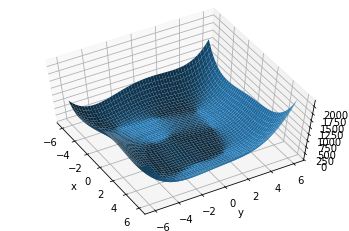

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def himmelblau(x):
  return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

x = np.arange(-6, 6, 0.01)
y = np.arange(-6, 6, 0.01)

X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [53]:
x = torch.tensor([4., 0.], requires_grad=True) #初始化非常重要
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):
  pred = himmelblau(x)
  optimizer.zero_grad()
  pred.backward()
  optimizer.step()

  if step % 2000 == 0:
    print('step {}: x = {}, f(x) = {}'.format(step, x.tolist(), pred.item()))

step 0: x = [3.999000072479248, -0.0009999999310821295], f(x) = 34.0
step 2000: x = [3.5741987228393555, -1.7641836404800415], f(x) = 0.09904662519693375
step 4000: x = [3.5844225883483887, -1.8481197357177734], f(x) = 2.1100277081131935e-09
step 6000: x = [3.5844264030456543, -1.8481241464614868], f(x) = 2.41016095969826e-10
step 8000: x = [3.58442759513855, -1.848125696182251], f(x) = 2.9103830456733704e-11
step 10000: x = [3.584428310394287, -1.8481262922286987], f(x) = 9.094947017729282e-13
step 12000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
step 14000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
step 16000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
step 18000: x = [3.584428310394287, -1.8481265306472778], f(x) = 0.0
